In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# **Basic Yaklaşımlar**

**Ne işe yarar?**
Bu fonksiyon, DataFrame'deki herhangi bir hücrede eksik (NaN) veri olup olmadığını hızlıca kontrol etmek için kullanılır. Eğer hiç eksik değer yoksa False, en az bir eksik değer varsa True döner.

**Kısaca:**
df.isnull().values.any() bir bool değeri döndürür. Eğer eksik veri varsa True, yoksa False döner.

In [ ]:
df.isnull().values.any()

True

**hangi sütunlarda eksik veri olduğunu hızlıca tespit etmek için kullanılır.**

In [ ]:
df.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


**Ne işe yarar?**


df.isnull().sum(), her sütundaki eksik (NaN) değerlerin sayısını gösterir. Eğer bir sütunda hiç eksik değer yoksa, o sütun için 0 döner. Eğer eksik değerler varsa, o sütundaki eksik değerlerin toplam sayısını döner.


**Kısaca:**


df.isnull().sum() her sütundaki eksik değerlerin sayısını bir pandas Series olarak döndürür.

In [ ]:
#Sıralama olarak büyükten küçüğe gider sıralı getirmez.
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


**Ne işe yarar?**


df.notnull().sum(), her sütundaki eksik olmayan (NaN olmayan) değerlerin sayısını gösterir. Eğer bir sütunda hiç eksik olmayan değer yoksa, o sütun için 0 döner. Eğer eksik olmayan değerler varsa, o sütundaki eksik olmayan değerlerin toplam sayısını döner.

**Kısaca:**


df.notnull().sum() her sütundaki eksik olmayan değerlerin sayısını bir pandas Series olarak döndürür.

In [ ]:
df.notnull().sum()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


**Ne işe yarar?**


df.isnull().sum().sum(), tüm DataFrame'deki toplam eksik (NaN) değer sayısını döndürür.

**Kısaca:**


df.isnull().sum().sum() tüm DataFrame'deki eksik (NaN) değerlerin toplam sayısını verir.

In [ ]:
df.isnull().sum().sum()

866

**Ne işe yarar?**


df[df.isnull().any(axis=1)], eksik (NaN) değere sahip olan satırları döndürür. Bu şekilde, DataFrame'deki eksik veriler içeren tüm satırları seçmiş olursunuz.

In [ ]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,missing_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000,0,0,SOTON/OQ 392076,7.050,NaN,S,False
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000,0,5,382652,29.125,NaN,Q,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,False


**Ne işe yarar?**


df[df.notnull().any(axis=1)], eksik olmayan (NaN olmayan) değerleri içeren satırları döndürür. Yani, DataFrame'deki en az bir hücresinde veri bulunan satırları seçmiş olursunuz.

In [ ]:
df[df.notnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,missing_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C,False


# **Eksik Değerlerin Detaylı Gösterilmesi ve İncelenmesi**

In [ ]:
import pandas as pd

# 1. Eksik değer bilgilerini gösteren fonksiyon
def missing_value_info_v1(dataframe, give_list=False):
    # Eksik değer sayısını ve yüzdesini hesapla
    missing_count = dataframe.isnull().sum()
    total_rows = len(dataframe)  # Toplam satır sayısını sadece bir kez hesapla
    missing_percentage = 100 * missing_count / total_rows

    # Eksik değer bilgilerini içeren bir DataFrame oluştur
    missing_df = pd.DataFrame({
        'Missing Value Count': missing_count,
        'Percentage (%)': missing_percentage
    })

    # Sadece eksik değere sahip sütunları göster
    missing_df = missing_df[missing_df['Missing Value Count'] > 0].sort_values(by='Missing Value Count', ascending=False)

    if give_list:
        # Eğer liste istendiyse, eksik sütun adlarını döndür
        return missing_df, missing_df.index.tolist()
    else:
        # Sadece DataFrame'i döndür
        return missing_df

# Örnek kullanım
new_df, missing_columns_list = missing_value_info_v1(df, give_list=True)
print(new_df)
print(missing_columns_list)


          Missing Value Count  Percentage (%)
Cabin                     687          77.104
Age                       177          19.865
Embarked                    2           0.224
['Cabin', 'Age', 'Embarked']


In [ ]:
import pandas as pd

# Eksik değer bilgilerini gösteren fonksiyon
def missing_value_info_v2(dataframe, give_list=False):
    # Eksik değer sayısını ve yüzdesini hesapla
    missing_count = dataframe.isnull().sum()
    total_rows = len(dataframe)  # Toplam satır sayısını bir kez hesapla
    missing_percentage = 100 * missing_count / total_rows

    # Eksik değer bilgilerini içeren bir DataFrame oluştur ve toplam satır sayısını ekle
    missing_df = pd.DataFrame({
        'Missing Value Count': missing_count,
        'Total Rows': total_rows,
        'Percentage (%)': missing_percentage
    })

    # Sadece eksik değere sahip sütunları göster
    missing_df = missing_df[missing_df['Missing Value Count'] > 0].sort_values(by='Missing Value Count', ascending=False)

    if give_list:
        # Eğer liste istendiyse, eksik sütun adlarını döndür
        return missing_df, missing_df.index.tolist()
    else:
        # Sadece DataFrame'i döndür
        return missing_df

# Örnek kullanım
new_df, missing_columns_list = missing_value_info_v2(df, give_list=True)
new_df


,Missing Value Count,Total Rows,Percentage (%)
Cabin,687,891,77.104
Age,177,891,19.865
Embarked,2,891,0.224


In [ ]:
missing_columns_list

['Cabin', 'Age', 'Embarked']

In [ ]:
import time

In [ ]:
# Başlangıç zamanını kaydet
start_time_1 = time.time()
new_df1, missing_columns_list1 = missing_value_info_v1(df, give_list=True)  # İlk fonksiyon
end_time_1 = time.time()
execution_time_1 = end_time_1 - start_time_1

# İkinci fonksiyon için başlangıç zamanını kaydet
start_time_2 = time.time()
new_df2, missing_columns_list2 = missing_value_info_v2(df, give_list=True)  # İkinci fonksiyon
end_time_2 = time.time()
execution_time_2 = end_time_2 - start_time_2

# Sonuçları yazdır
print(f"İlk fonksiyon çalışma süresi: {execution_time_1:.5f} saniye")
print(f"İkinci fonksiyon çalışma süresi: {execution_time_2:.5f} saniye")

İlk fonksiyon çalışma süresi: 0.00417 saniye
İkinci fonksiyon çalışma süresi: 0.00405 saniye


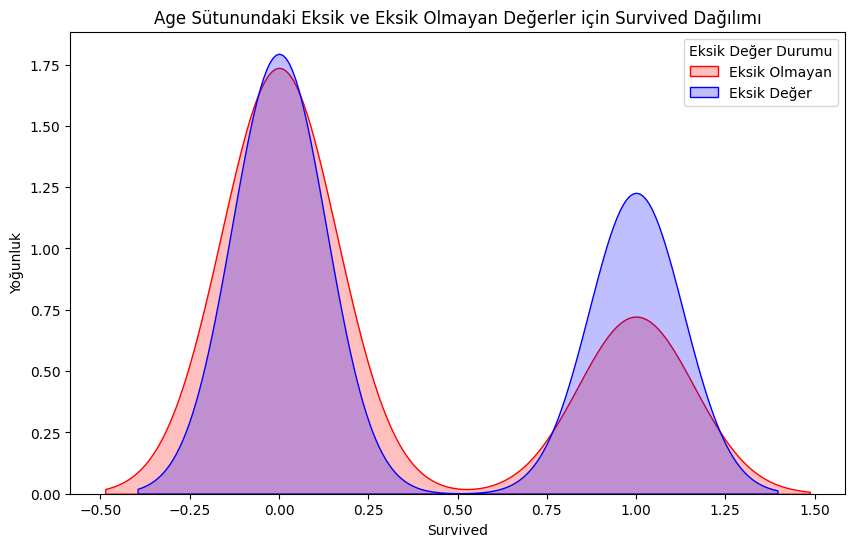

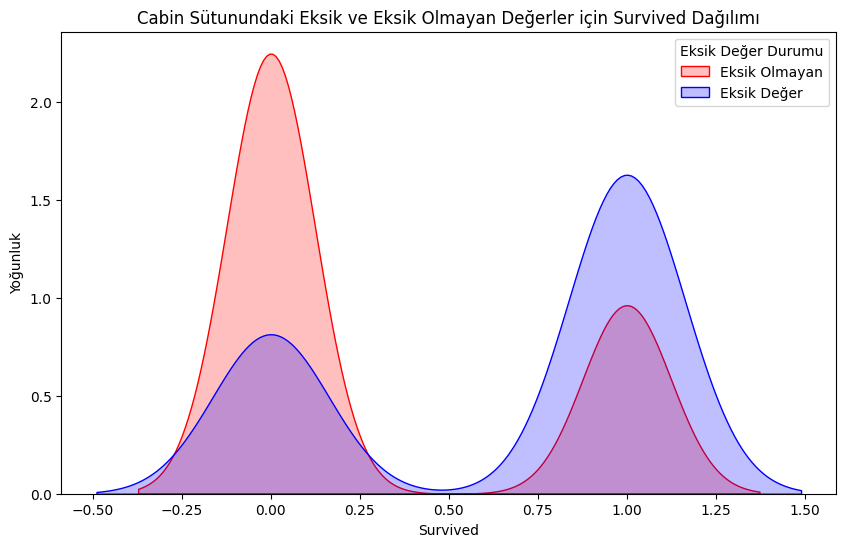

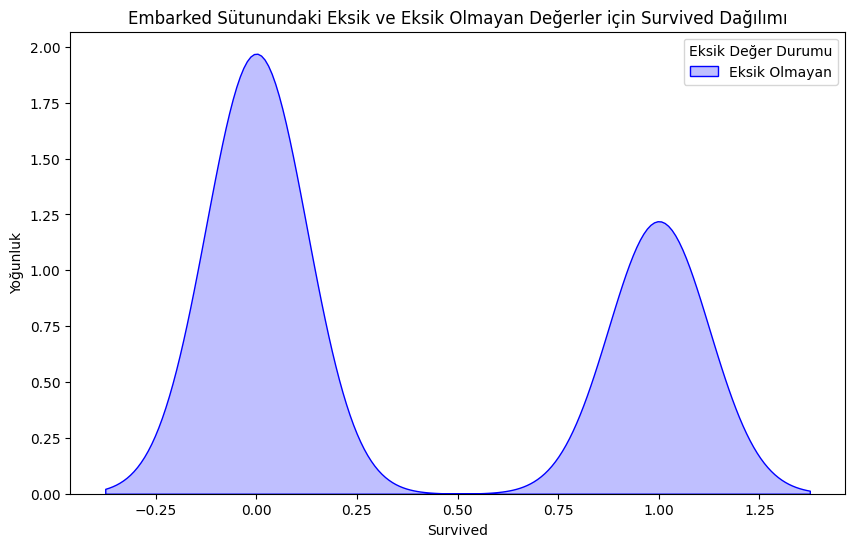

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Eksik değere sahip gözlemlerin ve eksik olmayan gözlemlerin hedef değişken dağılımını kıyaslama
def visualize_missing_vs_nonmissing(dataframe, target_column):
    # Hedef değişkenin sayısal olup olmadığını kontrol et
    is_target_numeric = pd.api.types.is_numeric_dtype(dataframe[target_column])

    # Eksik değere sahip sütunları belirle
    missing_columns = dataframe.columns[dataframe.isnull().any()].tolist()

    for column in missing_columns:
        plt.figure(figsize=(10, 6))

        if is_target_numeric:
            # Sayısal hedef değişkeni için KDE görselleştirmesi
            sns.kdeplot(
                dataframe.loc[dataframe[column].isnull(), target_column],
                color="red",
                fill=True,
                label="Eksik Değerler",
                 warn_singular=False
            )
            sns.kdeplot(
                dataframe.loc[~dataframe[column].isnull(), target_column],
                color="blue",
                fill=True,
                label="Eksik Olmayan Değerler",
                 warn_singular=False
            )
            plt.title(f"{column} Sütunundaki Eksik ve Eksik Olmayan Değerler için {target_column} Dağılımı")
            plt.xlabel(target_column)
            plt.ylabel("Yoğunluk")

        else:
            # Kategorik hedef değişkeni için Barplot görselleştirmesi
            sns.countplot(
                x=target_column,
                hue=dataframe[column].isnull(),
                data=dataframe,
                palette={True: "red", False: "blue"}
            )
            plt.title(f"{column} Sütunundaki Eksik ve Eksik Olmayan Değerler için {target_column} Dağılımı")
            plt.xlabel(target_column)
            plt.ylabel("Sayı")

        plt.legend(title="Eksik Değer Durumu", labels=["Eksik Olmayan", "Eksik Değer"])
        plt.show()

# Örnek kullanım: visualize_missing_vs_nonmissing(df, 'target_column')
visualize_missing_vs_nonmissing(df, 'Survived')


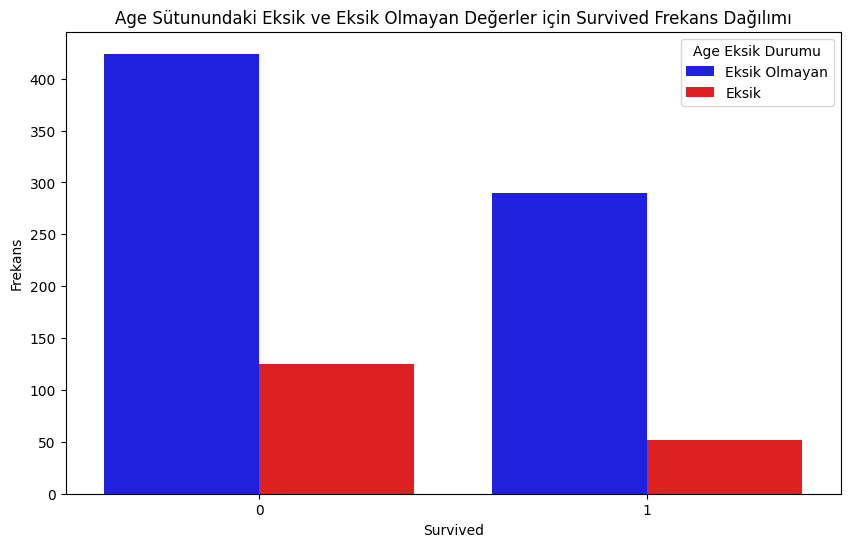

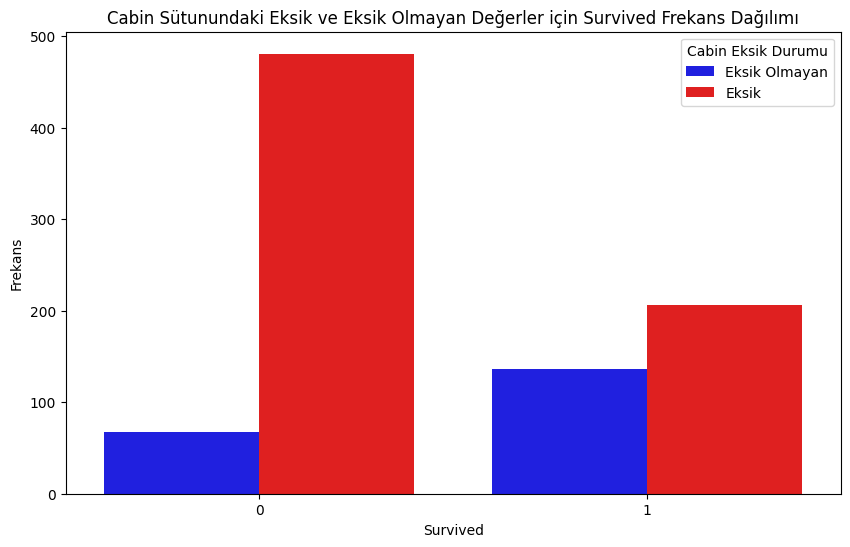

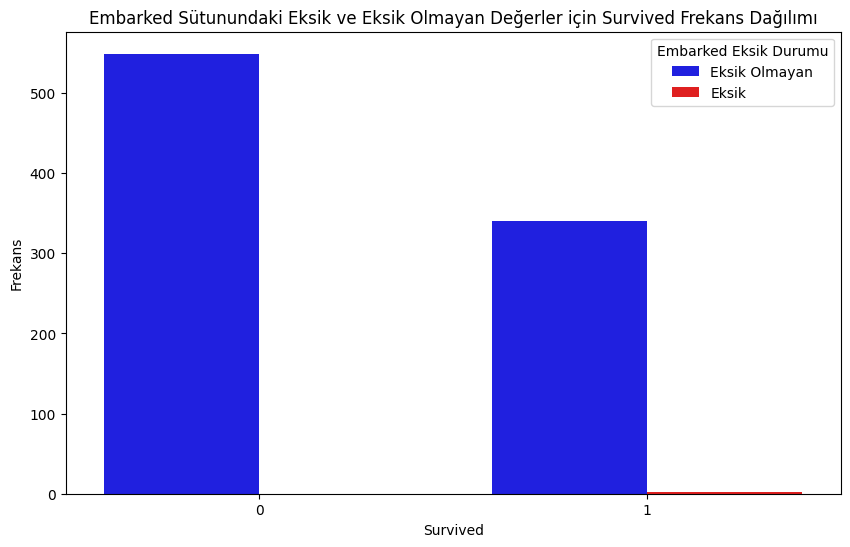

   Survived  Column Name  Eksik Değer Sayısı Eksik Değerin Oranı
0       Age            0                 125              22.77%
1       Age            1                  52              15.20%
2     Cabin            0                 481              87.61%
3     Cabin            1                 206              60.23%
4  Embarked            0                   0               0.00%
5  Embarked            1                   2               0.58%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_missing_impact_on_survived(dataframe, target_column):
    # Eksik değere sahip sütunları belirleyelim
    missing_columns = dataframe.columns[dataframe.isnull().any()].tolist()

    # Satırları biriktirecek liste
    data_rows = []

    # Eksik sütunlar için işlem yapalım
    for column in missing_columns:
        # Eksik ve eksik olmayan veriler için 'missing_status' kolonu oluşturuyoruz
        dataframe['missing_status'] = dataframe[column].isnull()

        # Hedef kolondaki benzersiz değerleri alalım
        target_column_unique = dataframe[target_column].unique().tolist()

        # Her bir benzersiz hedef değeri için eksik verileri hesaplayalım
        for value in target_column_unique:
            # İlgili hedef değeri için veriyi gruplandıralım
            group_data = dataframe[dataframe[target_column] == value]
            missing_count = group_data['missing_status'].sum()
            total_count = len(group_data)

            # Eksik değer oranını hesapla
            missing_percentage = (missing_count / total_count) * 100

            # Satırı listeye ekleyelim
            data_rows.append([column, value, missing_count, f"{missing_percentage:.2f}%"])

        # Grafik çizimi
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, x=target_column, hue='missing_status', palette=['blue', 'red'])
        plt.title(f"{column} Sütunundaki Eksik ve Eksik Olmayan Değerler için {target_column} Frekans Dağılımı")
        plt.xlabel(target_column)
        plt.ylabel("Frekans")
        plt.legend(title=f"{column} Eksik Durumu", labels=["Eksik Olmayan", "Eksik"])
        plt.show()

    # Listeyi DataFrame'e dönüştür
    new_df = pd.DataFrame(data_rows, columns=[target_column, 'Column Name', 'Eksik Değer Sayısı', 'Eksik Değerin Oranı'])

    # Sonuçları döndürelim
    return new_df

# Çalıştırma
missing_summary_df = visualize_missing_impact_on_survived(df, 'Survived')

# Sonuçları yazdıralım
print(missing_summary_df)


In [ ]:
missing_summary_df

,Survived,Column Name,Eksik Değer Sayısı,Eksik Değerin Oranı
0,Age,0,125,22.77%
1,Age,1,52,15.20%
2,Cabin,0,481,87.61%
3,Cabin,1,206,60.23%
4,Embarked,0,0,0.00%
5,Embarked,1,2,0.58%


# **Hazır ve hızlı karar verme**

In [ ]:
import missingno as msno

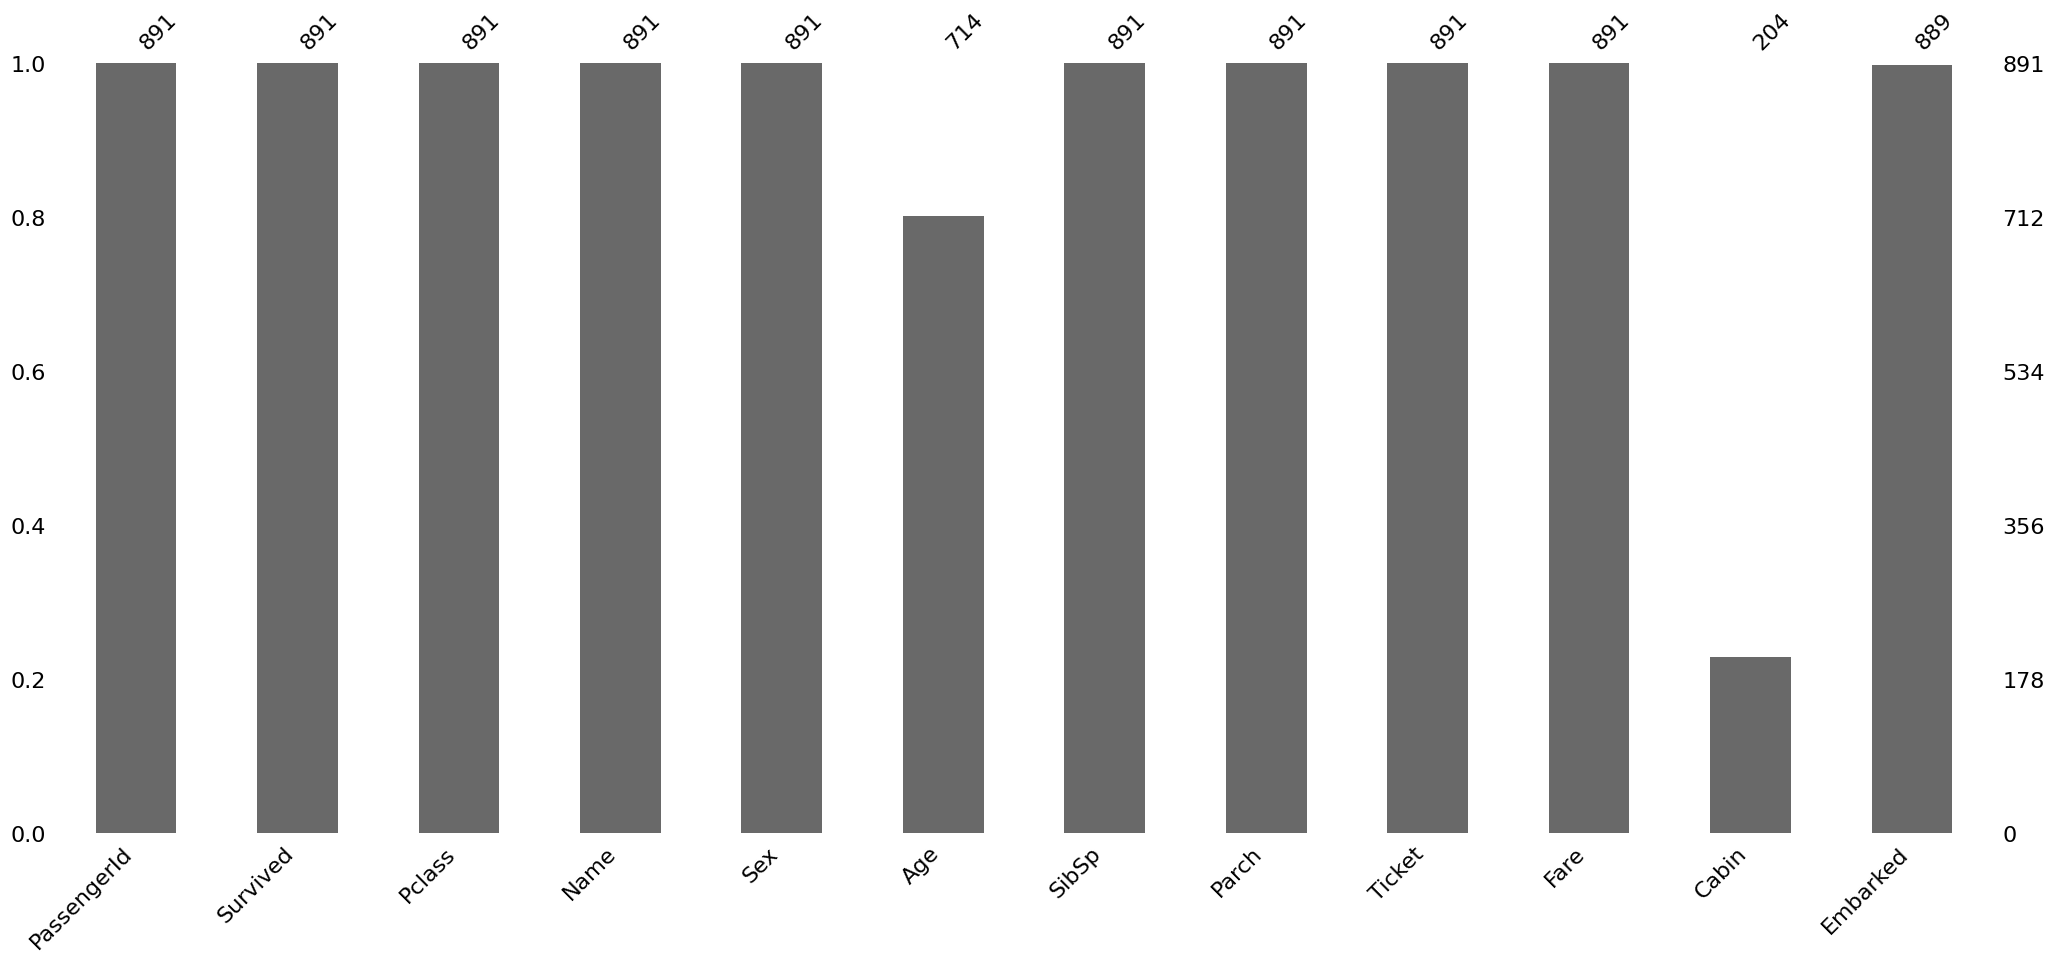

In [ ]:
msno.bar(df)
plt.savefig('./missing_bar.png')
plt.show()

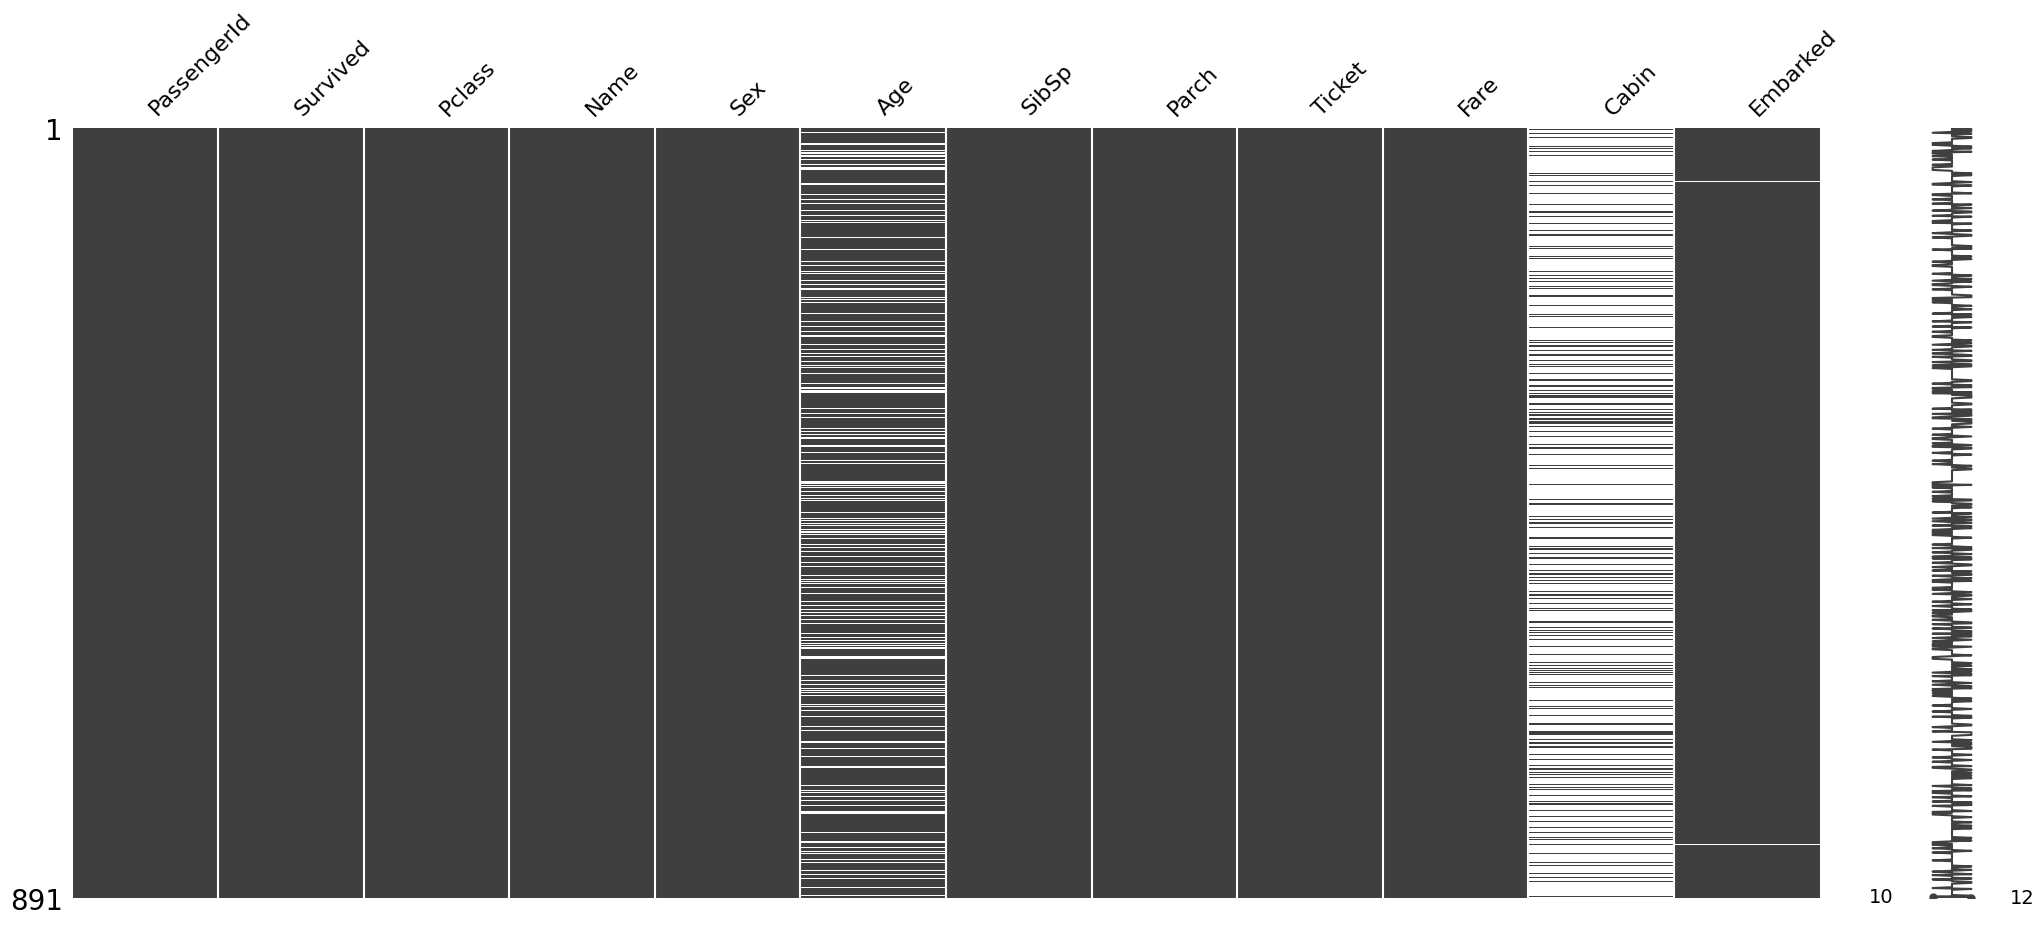

In [ ]:
msno.matrix(df)
plt.savefig('./missing_matrix.png')
plt.show()

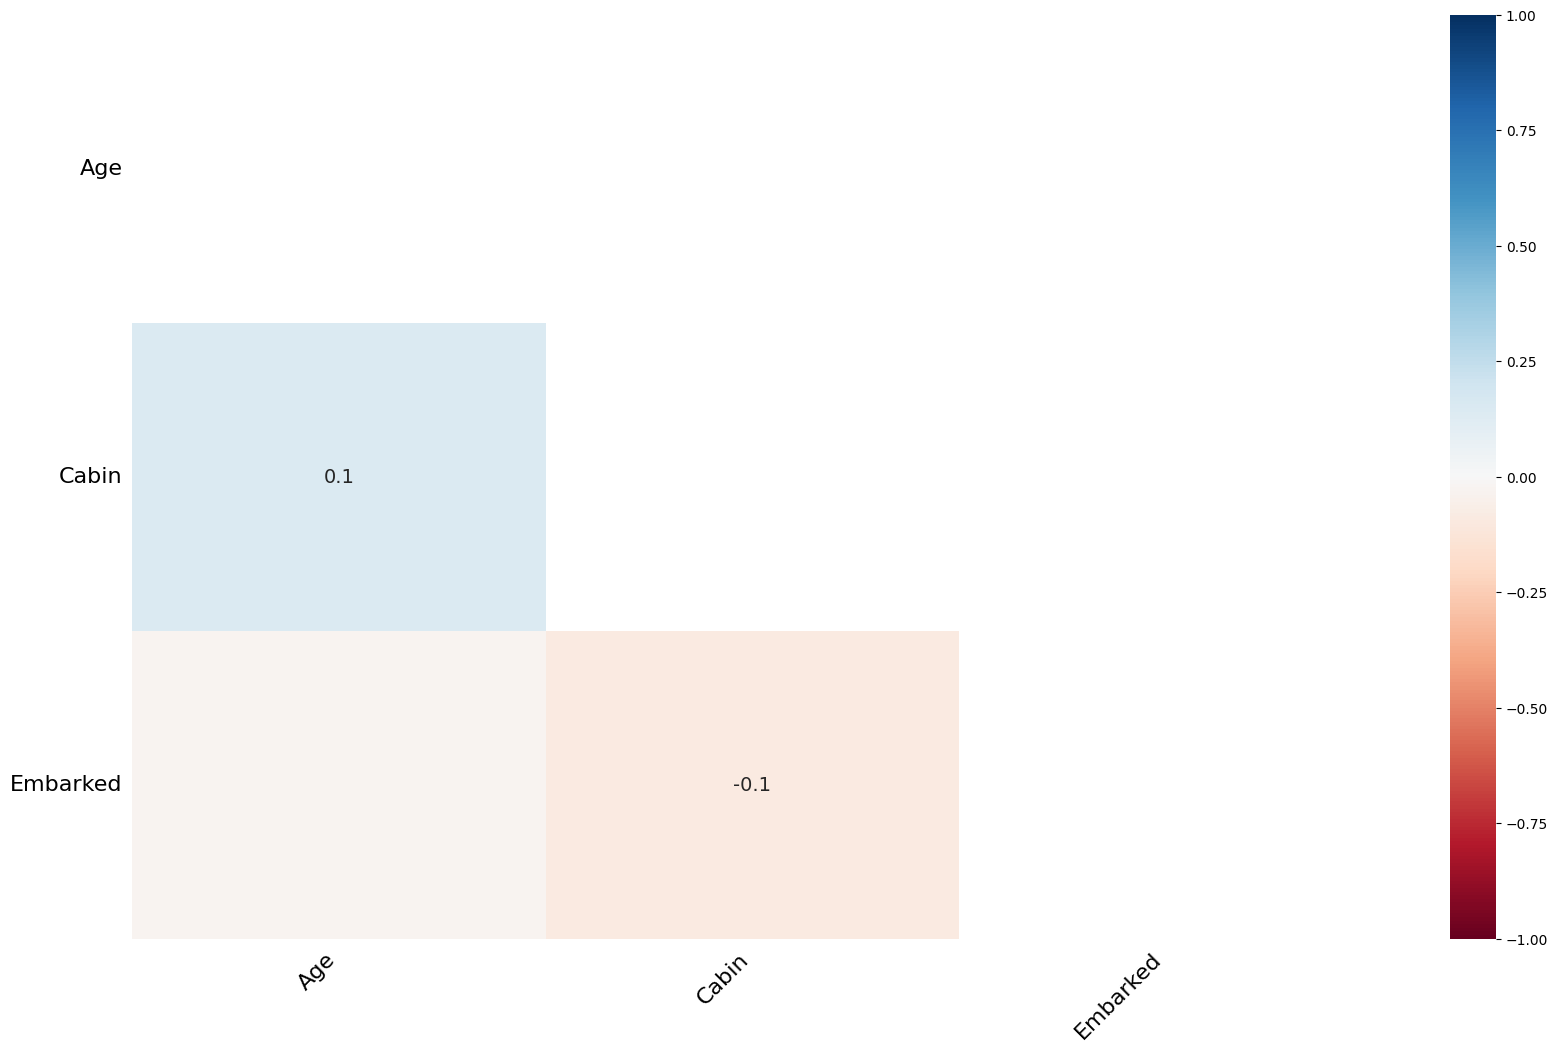

In [ ]:
msno.heatmap(df)
plt.savefig('./missing_heatmap.png')
plt.show()

# **DOLDURMA YÖNTEMLERİ**

**1. Eksik Verileri Sabit Bir Değer ile Doldurma**

In [ ]:
# Cabin (kategorik) için sabit bir kategori
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Age (sayısal) için sabit bir değer
df['Age'] = df['Age'].fillna(0)


**2. Eksik Verileri Sütun Ortalaması ile Doldurma**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


**3. Eksik Verileri Sütun Ortanca (Median) Değeri ile Doldurma**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())


**4. Eksik Verileri Mod (En Sık Görülen Değer) ile Doldurma**

In [ ]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])


**5. İleri (Forward) Dolgu ile Doldurma (Forward Fill)**

In [ ]:
df['Cabin'] = df['Cabin'].fillna(method='ffill')
df['Age'] = df['Age'].fillna(method='ffill')


**6. Geriye (Backward) Dolgu ile Doldurma (Backward Fill)**

In [ ]:
df['Cabin'] = df['Cabin'].fillna(method='bfill')
df['Age'] = df['Age'].fillna(method='bfill')


**7. Interpolasyon ile Doldurma**


Eksik değerleri mevcut verilere göre tahmin ederek doldurur. Genellikle sayısal verilerde kullanılır.

In [ ]:
df['Age'] = df['Age'].interpolate(method='linear')


**8. Gelişmiş Yöntem: Kategorik ve Sayısal Verileri Aynı Anda Doldurma**


In [ ]:
#Sayısal sütunlardaki eksik verileri medyan ile doldurup kategorik sütunlara dokunmamak.
df = df.apply(lambda x: x.fillna(x.median()) if x.dtype != 'O' else x, axis=0)


In [ ]:
#Unique veri sayısı 10dan düşük ise moda göre doldur değilse doldurma.
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' and len(x.unique()) <= 10 else x, axis=0)


In [ ]:
#Bir sütunundaki eksik değerleri, başka bir sütunundaki gruplara göre doldurmak.
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))


In [ ]:
#Bir sütundaki eksik değerleri doldurmak için bir makine öğrenimi modeli kullanmak.
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Kategorik: Cabin için tahmin modeli ile doldurma
X_train = df.dropna(subset=['Cabin']).drop(columns='Cabin')
y_train = df.dropna(subset=['Cabin'])['Cabin']

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Eksik Cabin değerlerini model ile tahmin ederek doldurma
df.loc[df['Cabin'].isna(), 'Cabin'] = model.predict(df[df['Cabin'].isna()].drop(columns='Cabin'))
